## **Performance for Regression-Based Models**

The metrics we will use:

* MSE
* RMSE
* MAE
* MAPE
* R2

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/martinwg/ISA591/refs/heads/main/data/used_cars_sales_clean.csv')
df.head()

,condition,odometer,mmr,sellingprice,make_BMW,make_Mercedes-Benz,make_Rolls-Royce,make_Infiniti,make_Ram,body_Sedan,...,interior_red,interior_silver,interior_tan,interior_unknown,interior_white,interior_yellow,interior_—,carage_5 to 10 years,carage_less than 5 years,carage_older than 15 years
0,2.0,158959.0,4850,4500,0,0,0,0,0,1,...,False,False,False,False,False,False,True,False,False,False
1,2.1,124858.0,4825,2800,0,0,0,0,0,1,...,False,False,False,False,False,False,False,True,False,False
2,4.3,23771.0,27600,28000,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
3,4.0,24304.0,21100,21750,1,0,0,0,0,1,...,False,False,False,False,False,False,False,False,True,False
4,2.0,93837.0,6925,3100,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False


In [3]:
## Let's create the X matrix and y vector
X = df.drop('sellingprice', axis = 1)
y = df.sellingprice ## numeric variable - regression problem

### **Split the data into training (90%) and test (10%). Use random_state = 13**

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 13)

In [5]:
## check the shapes
X_train.shape, y_train.shape

((78740, 59), (78740,))

In [6]:
X_test.shape, y_test.shape

((8749, 59), (8749,))

## **Modeling**

Run two models and then decide which one is the best. The models to fit:

* Linear regression
* Random Forest (80 trees)

In [7]:
## Linear regression
from sklearn.linear_model import LinearRegression

## instance
## we do not care about the goodness of fit metrics
lr = LinearRegression()

## fit on the training data set
lr.fit(X_train, y_train)

LinearRegression()

In [8]:
## Random Forest
from sklearn.ensemble import RandomForestRegressor

## instance
rf = RandomForestRegressor(n_estimators = 80, n_jobs = -1) ## parallel processing in different cores

## fit on the training data set
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=80, n_jobs=-1)

In [9]:
## Get the predicted values
y_pred_lr = lr.predict(X_test) ## yhats, ypreds for linear reg
y_pred_rf = rf.predict(X_test) ## yhats for random forest

In [10]:
y_pred_lr[:10]

array([17165.93004568,  9144.29467806,  6032.5662268 ,  9502.56225397,
        7965.00059296,  6145.19641185, 18520.02253964, 22295.76440848,
       -1098.07315615, 34417.60863451])

In [11]:
y_pred_rf[:10]

array([16972.5   ,  8891.875 ,  5026.25  ,  9607.5   ,  8275.    ,
        5815.    , 18689.375 , 22859.375 ,   404.6875, 33296.875 ])

In [13]:
y_test[:10].values

array([17600,  9300,  6200,  9400,  9000,  6500, 18500, 24250,   225,
       35700])

### **Check which model predicts best**

In [14]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

In [18]:
## MSE
print(f"The MSE for LR: {mean_squared_error(y_test, y_pred_lr)} ")
print(f"The MSE for RF: {mean_squared_error(y_test, y_pred_rf)} ")

The MSE for LR: 2667182.824527917 
The MSE for RF: 3441104.3255551527 


In [19]:
## RMSE
print(f"The RMSE for LR: {root_mean_squared_error(y_test, y_pred_lr)} ")
print(f"The RMSE for RF: {root_mean_squared_error(y_test, y_pred_rf)} ")

The RMSE for LR: 1633.1511946319963 
The RMSE for RF: 1855.021381428029 


In [20]:
## MAE
print(f"The MAE for LR: {mean_absolute_error(y_test, y_pred_lr)} ")
print(f"The MAE for RF: {mean_absolute_error(y_test, y_pred_rf)} ")

The MAE for LR: 1005.5460908754072 
The MAE for RF: 1027.9734726825923 


In [21]:
## MAPE
print(f"The MAPE for LR: {mean_absolute_percentage_error(y_test, y_pred_lr)} ")
print(f"The MAPE for RF: {mean_absolute_percentage_error(y_test, y_pred_rf)} ")

The MAPE for LR: 0.15911276103130767 
The MAPE for RF: 0.14511882871003037 


In [22]:
## R2
print(f"The R2 for LR: {r2_score(y_test, y_pred_lr)} ")
print(f"The R2 for RF: {r2_score(y_test, y_pred_rf)} ")

The R2 for LR: 0.9713397484341648 
The R2 for RF: 0.9630235637663308 


The LR is the best. LR is less complex. We can explain relationships.

In [24]:
## Slopes
pd.DataFrame({'Variables': X_train.columns, 'slopes':lr.coef_})

,Variables,slopes
0,condition,953.211904
1,odometer,0.002428
2,mmr,0.963955
3,make_BMW,110.467981
4,make_Mercedes-Benz,-25.010161
5,make_Rolls-Royce,1294.622838
6,make_Infiniti,159.364207
7,make_Ram,144.618586
8,body_Sedan,-12.218923
9,body_Crew Cab,206.493289


In [27]:
## MSE is susceptible to outliers
## MAE
## MEDIAN ABSOLUTE ERROR
(np.abs(y_test - y_pred_lr)).median()

694.0506879358945

In [26]:
np.mean([1000, 2000, 1500, 1300, 40000])

9160.0

## **How to Evaluate Peformance of Classification Problems**

**Confusion Matrix**

A summary of the predictions compared to the actuals.

- rows are true values
- columns are the pred values

In [28]:
y_true = np.array([0,0,0,1,1,1,1,1])
## the predictions for the models might be in propensities
p_hat = np.array([.4,.52,.2,.9,.1,.8,.1,.49])

In [29]:
## the y_preds are obtained by choosing a threshold
## 0.5 is the default
y_pred = (p_hat > 0.5).astype(int)

In [30]:
print(y_true)
print(y_pred)

[0 0 0 1 1 1 1 1]
[0 1 0 1 0 1 0 0]


In [31]:
## Confusion Matrix
conf_matrix = np.array([ [2,1],
                         [3,2] ])

In [32]:
conf_matrix

array([[2, 1],
       [3, 2]])

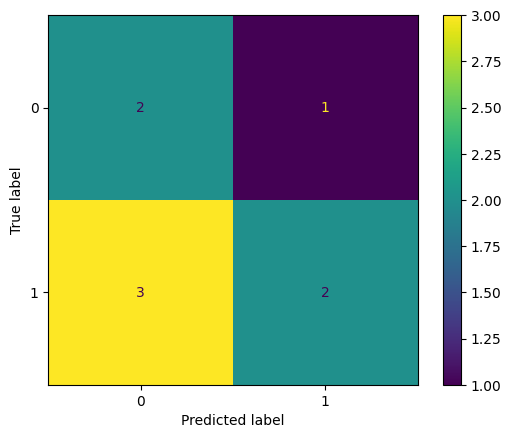

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay(  confusion_matrix(y_true, y_pred) ).plot();